# Runge phenomenon

In [1]:
using FundamentalsNumericalComputation

This function has infinitely many continuous derivatives on the entire real line and looks very easy to approximate over $[-1,1]$.

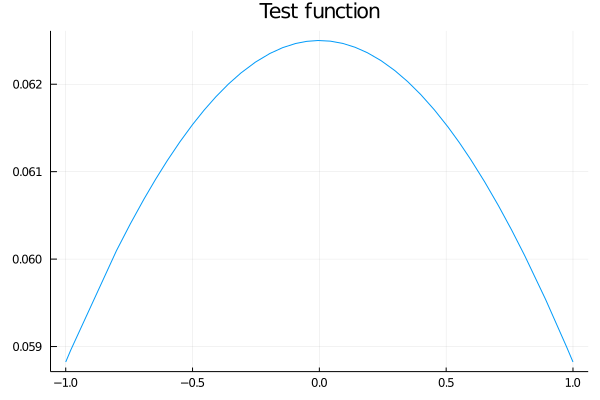

In [2]:
f = x -> 1/(x^2 + 16)
plot(f,-1,1,title="Test function",legend=:none)

We start by doing equispaced polynomial interpolation for some rather small values of $n$.

In [3]:
plot(label="",xaxis=(L"x"),yaxis=(:log10,L"|f(x)-p(x)|",[1e-20,1]))

x = LinRange(-1,1,2501)
n = 4:4:12
for (k,n) = enumerate(n)
    t = OffsetArray(LinRange(-1,1,n+1),0:n)    # equally spaced nodes
    y = f.(t)                                  # interpolation data
    p = FNC.polyinterp(t,y)
    err = @.abs(f(x)-p(x))
    plot!(x,err,m=(1,:o,stroke(0)),label="degree $n")
end
title!("Error for low degrees")

The convergence so far appears rather good, though not uniformly so. Now watch what happens as we continue to increase the degree.

In [4]:
n = @. 12 + 15*(1:3)
plot(label="",xaxis=(L"x"),yaxis=(:log10,L"|f(x)-p(x)|",[1e-20,1]))

for (k,n) = enumerate(n)
    t = OffsetArray(LinRange(-1,1,n+1),0:n)    # equally spaced nodes
    y = f.(t)                                  # interpolation data
    p = FNC.polyinterp(t,y)
    err = @.abs(f(x)-p(x))
    plot!(x,err,m=(1,:o,stroke(0)),label="degree $n")
end
title!("Error for higher degrees")

The convergence in the middle can't get any better than machine precision. So maintaining the growing gap between the center and the ends pushes the error curves upward exponentially fast at the ends, wrecking the convergence.